In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

from numpy.random import randint

# Game of Life Rules
1. Any live cell with two or three live neighbours survives.
2. Any dead cell with three live neighbours becomes a live cell.
3. All other live cells die in the next generation. Similarly, all other dead cells stay dead.

In [105]:
# initial setup
rows = 15
cols = 15
board = randint(0, high=2, size=(rows, cols))

In [106]:
board

array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])

In [87]:
def get_live_neighbors(m, n, curr_board):
    c_start, c_end = max(0,n-1), min(cols-1, n+1)
    r_start, r_end = max(0,m-1), min(cols-1, m+1)
    return curr_board[r_start:r_end+1, c_start:c_end+1].sum() - curr_board[m, n]

def update_cell(num_live, state):
    if num_live in (2, 3) and state == 1:
        return 1
    if num_live == 3 and state == 0:
        return 1
    
    return 0

def update_board(curr_board):
    new_board = np.zeros((rows, cols), dtype=int)
    for row in range(curr_board.shape[0]):
        for col in range(curr_board.shape[1]):
            num_live = get_live_neighbors(row, col, curr_board)
            new_state = update_cell(num_live, curr_board[row, col])
            new_board[row, col] = new_state
    
    return new_board

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
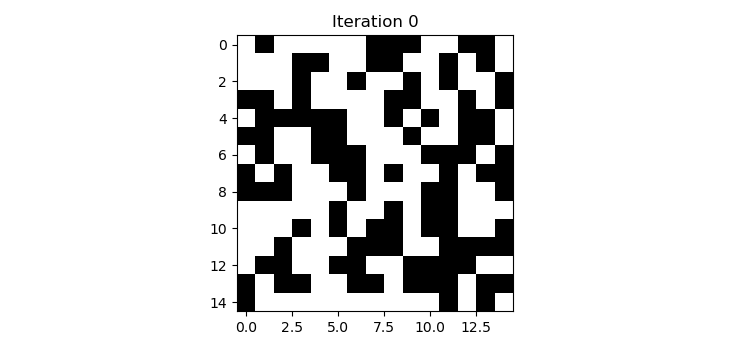

In [107]:
fig, ax = plt.subplots()
ax.set_aspect(1)
im = plt.imshow(board, interpolation='none', cmap='binary')
ax.set_title(f"Iteration 0")

def init():
    im.set_data(randint(0, high=2, size=(rows, cols)))
    return [im]

boards = []
def animate(i):
    curr_board = im.get_array()
    boards.append(curr_board)
    new_board = update_board(curr_board)
    im.set_array(new_board)
    ax.set_title(f"Iteration {i}")
    return [im]

anim = FuncAnimation(fig, animate, init_func=init, frames=1000, interval=300, blit=False)

plt.show()

In [108]:
anim.event_source.stop()

In [109]:
plt.close('all')